In [2]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     |################################| 21.8 MB 120 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
     |################################| 81 kB 1.8 MB/s eta 0:00:011
Using legacy 'setup.py install' for cufflinks, since package 'wheel' is not installed.
    Running setup.py install for cufflinks ... done
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
     |################################| 94 kB 882 kB/s eta 0:00:011
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
!pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
     |################################| 10.1 MB 4.1 MB/s eta 0:00:01
Using legacy 'setup.py install' for pycountry, since package 'wheel' is not installed.
    Running setup.py install for pycountry ... done
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [9]:
import pandas as pd
import json
import requests

import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8

import cufflinks as cf

import folium
pyo.init_notebook_mode(connected = True)
cf.go_offline()

import numpy as np
from random import randint

import pycountry

import os

In [10]:
df = pd.read_csv("data_tweet_vaksinasi_sentiment_v2.csv")
df

,created_at,user,location,coordinates,text,retweet_count,favorite_count,id,nama_kota,avg_word,word_count,sentiment,analysis
0,2021-08-14 14:53:43,restrotangkot,"Jl. Daan Mogot No.5, Tangerang",NaN,jajar polsek ciledug polres metro tangerang pi...,0,0,ID3172,JAKARTA TIMUR,6.125000,21,2,Netral
1,2021-08-14 14:53:42,dryxanne,Jakarta,NaN,habis tu bangun lsg brasa lrga hanya mimpi seg...,0,0,ID3172,JAKARTA TIMUR,5.000000,26,-4,Negatif
2,2021-08-14 14:53:24,bukanlucinta,"Jakarta, Indonesia.",NaN,bertanyarl lho syukur bisa astra arti sehat ba...,0,0,ID3172,JAKARTA TIMUR,5.461538,24,19,Positif
3,2021-08-14 14:53:09,mporatne,"DKI Jakarta, Indonesia",NaN,trianadewi dipegangin bupati biar tidak takut,0,0,ID3172,JAKARTA TIMUR,6.666667,11,0,Netral
4,2021-08-14 14:52:20,whopsy_opsy,Jakarta,NaN,buset habis makan melulu,0,0,ID3172,JAKARTA TIMUR,5.250000,6,1,Netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,2021-08-13 5:41:58,dityaawahyu,"Pamulang, Indonesia",NaN,sodara lingkung kena tolong infoin kxlixpwk kx...,3,1,ID3171,JAKARTA SELATAN,6.714286,24,0,Netral
5376,2021-08-13 19:45:00,dicxvlr,"Tangerang, INDONESIA",NaN,sakit kepala sekali abs,0,0,ID3173,JAKARTA PUSAT,5.000000,5,-6,Negatif
5377,2021-08-13 5:01:52,vascodagambir,"Cikarang, Indonesia",NaN,helianthus an gringozika dimasukin virus mati nis,0,0,ID3173,JAKARTA PUSAT,6.142857,15,4,Netral
5378,2021-08-13 5:01:25,rakapradana07,"Jakarta Capital Region, Indonesia",NaN,cari badan sertifikasi vacine ta kurang scdela...,0,0,ID3173,JAKARTA PUSAT,6.250000,27,-12,Negatif


In [20]:
df_total = pd.read_csv("data_tweet_vaksinasi_sentiment_v2 - Pivot Table 1.csv")
df_total

,nama_kota,id,Negatif,Netral,Positif,Grand Total
0,JAKARTA BARAT,ID3174,870,430,270,1570
1,JAKARTA PUSAT,ID3173,200,100,300,600
2,JAKARTA SELATAN,ID3171,660,960,790,2410
3,JAKARTA TIMUR,ID3172,1556,2345,1089,4990
4,JAKARTA UTARA,ID3175,760,780,310,1850


In [32]:
df_final = pd.read_csv("data_tweet_vaksinasi_sentiment_v2 - Pivot Table 2.csv")
df_final

,nama_kota,id,Negatif,Netral,Positif,Grand Total,Negatif Pros,Netral Pros,Positif Pros
0,JAKARTA BARAT,ID3174,870,430,270,1570,0.554140,0.273885,0.171975
1,JAKARTA PUSAT,ID3173,200,100,300,600,0.333333,0.166667,0.500000
2,JAKARTA SELATAN,ID3171,660,960,790,2410,0.273859,0.398340,0.327801
3,JAKARTA TIMUR,ID3172,1556,2345,1089,4990,0.311824,0.469940,0.218236
4,JAKARTA UTARA,ID3175,760,780,310,1850,0.410811,0.421622,0.167568


In [42]:
regency_geo = 'JK_regencies.json'
regency_index = df_final

m = folium.Map(location=[-6.2, 106.90],tiles='OpenStreetMap', zoom_start=11)
folium.Choropleth(
    geo_data=regency_geo,
    name='choropleth',
    data=df_final,
    columns=['id', 'Positif Pros'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=1.0,
    line_opacity=0.2,
    legend_name='Prosentase Positif'
).add_to(m)

m

In [50]:
regency_geo = 'JK_regencies.json'
regency_index = df_final

m_neg = folium.Map(location=[-6.2, 106.90],tiles='OpenStreetMap', zoom_start=11)
folium.Choropleth(
    geo_data=regency_geo,
    name='choropleth',
    data=df_final,
    columns=['id', 'Negatif Pros'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=1.0,
    line_opacity=0.2,
    legend_name='Prosentase Negatif'
).add_to(m_neg)

m_neg

In [46]:
regency_geo = 'JK_regencies.json'
regency_index = df_final

m_netral = folium.Map(location=[-6.2, 106.90],tiles='OpenStreetMap', zoom_start=11)
folium.Choropleth(
    geo_data=regency_geo,
    name='choropleth',
    data=df_final,
    columns=['id', 'Netral Pros'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=1.0,
    line_opacity=0.2,
    legend_name='Prosentase Netral'
).add_to(m_netral)

m_netral

In [37]:
barat = df_final.loc[0,['Negatif', 'Netral', 'Positif']].tolist()
pusat = df_final.loc[1,['Negatif', 'Netral', 'Positif']].tolist()
selatan = df_final.loc[2,['Negatif', 'Netral', 'Positif']].tolist()
timur = df_final.loc[3,['Negatif', 'Netral', 'Positif']].tolist()
utara = df_final.loc[4,['Negatif', 'Netral', 'Positif']].tolist()

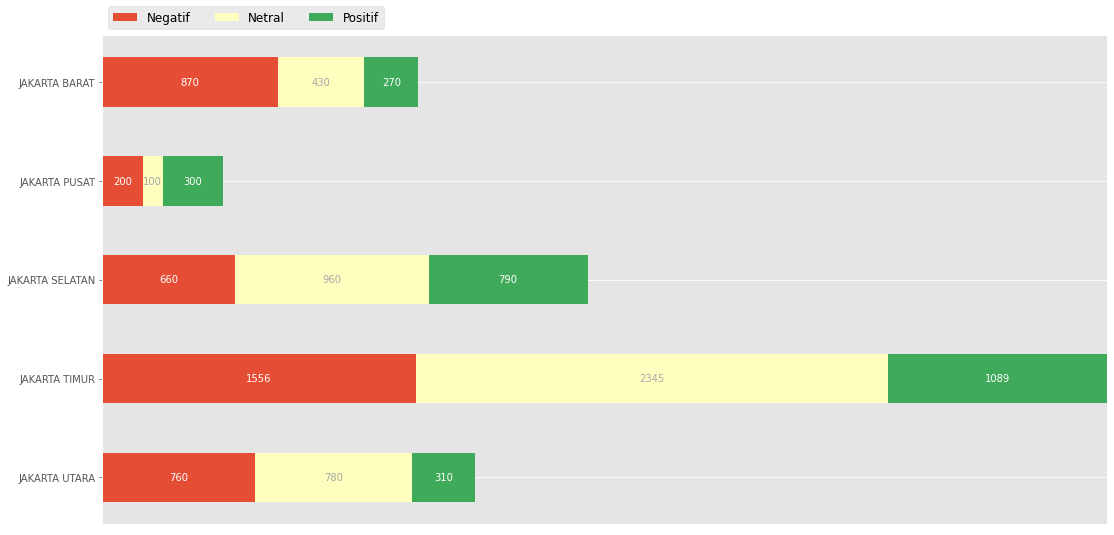

In [38]:
indikator = ['Negatif', 'Netral', 'Positif']
provinsi = {
    'JAKARTA BARAT': barat,
    'JAKARTA PUSAT': pusat,
    'JAKARTA SELATAN': selatan,
    'JAKARTA TIMUR': timur,
    'JAKARTA UTARA': utara,
    
}

def survey(provinsi, indikator):
  
    labels = list(provinsi.keys())
    data = np.array(list(provinsi.values()))
    data_cum = data.cumsum(axis=1)
    indikator_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(18, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(indikator, indikator_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(indikator), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(provinsi, indikator)
plt.show()

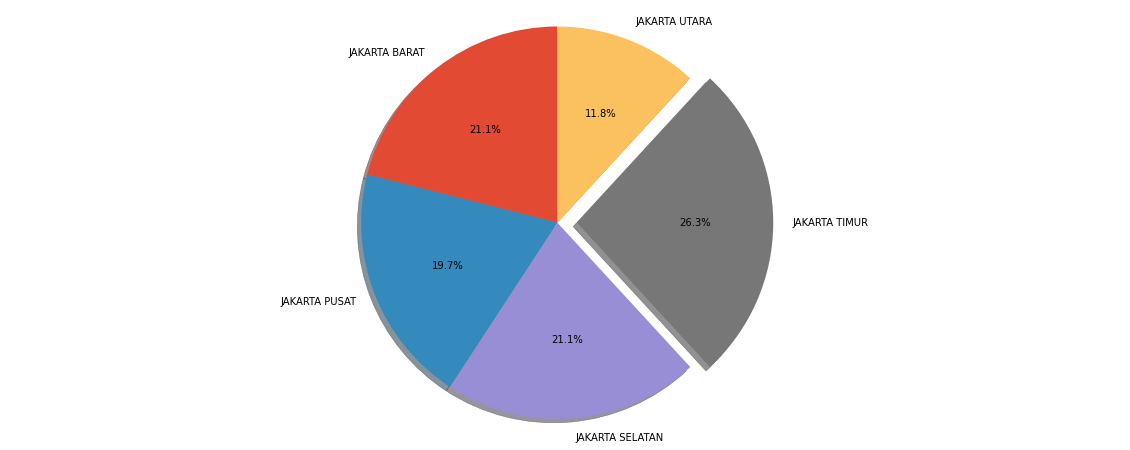

In [39]:

labels = 'JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR','JAKARTA UTARA'
sizes = [16, 15, 16, 20, 9]
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [55]:
m_neg